In [1]:
import json
import spotify_scraper as sp
from secrets import *
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# API requests
token = sp.getAccessToken(clientId, clientSecret)

trackData = []

# Playlist names: Rock Your Block, Ready to Rock, Rock Classics, 90s Rock Anthems, Soft Rock, 00s Rock Anthems, 80s Rock Anthems
playlistIds = ['37i9dQZF1DX8jpyvTAre41', 
               '37i9dQZF1DX34lqLRYWFxq', 
               '37i9dQZF1DWXRqgorJj26U', 
               '37i9dQZF1DX1rVvRgjX59F',
               '37i9dQZF1DX6xOPeSOGone',
               '37i9dQZF1DX3oM43CtKnRV',
               '37i9dQZF1DX1spT6G94GFC']

In [3]:
for playlist in playlistIds:
    p = {}
    tracklist = sp.getPlaylist(token, playlist, p)
    
    for item in tracklist['tracks']['items']:

        # Get audio feature of each item
        features = sp.getAudioFeatures(token, item['track']['id'], p)
        features.update({
            'track_id': item['track']['id'],
            'track_name': item['track']['name'],
            'album_id': item['track']['album']['id'],
            'album_name': item['track']['album']['name'],
            'playlist_id': tracklist['id'],
            'playlist_name': tracklist['name'],
            'release_date': item['track']['album']['release_date'],
            'explicit': item['track']['explicit'],
            'popularity': item['track']['popularity']
        })
        trackData.append(features)

In [4]:
df = pd.DataFrame(trackData)
df['release_date'] = pd.to_datetime(df['release_date'])
df = df.sort_values(by='release_date')

In [5]:
df.to_csv('spotify_playlists.csv', encoding='utf-8', index=False)

In [6]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,track_id,track_name,album_id,album_name,playlist_id,playlist_name,release_date,explicit,popularity
234,0.567,0.959,8,-3.822,1,0.1020,0.099500,0.000061,0.1000,0.961,...,4,1oG2vWELiGjIqxwqGcyqwF,You Really Got Me,3hXXoaAA09avxBSSxtPIaL,Kinks (Super Deluxe Edition),37i9dQZF1DWXRqgorJj26U,Rock Classics,1964-10-02,False,0
223,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.931,...,4,2PzU4IB8Dr6mxV3lHuaG34,(I Can't Get No) Satisfaction - Mono Version,2Q5MwpTmtjscaS34mJFXQQ,Out Of Our Heads,37i9dQZF1DWXRqgorJj26U,Rock Classics,1965-07-30,False,80
407,0.332,0.179,5,-11.830,1,0.0326,0.879000,0.000000,0.0886,0.315,...,4,1e0hllQ23AG0QGFgezgLOq,Yesterday - Remastered,19K3IHYeVkUTjcBHGfbCOi,Help! (Remastered),37i9dQZF1DX6xOPeSOGone,Soft Rock,1965-08-06,False,0
287,0.505,0.836,5,-7.384,0,0.1010,0.010300,0.077100,0.2950,0.764,...,4,1RJeiAIwR9pZBgJA8ndZLL,"Paint It, Black - Mono",5nKpMsduwp5xqCKq2IbSKv,The Rolling Stones In Mono (Remastered 2016),37i9dQZF1DWXRqgorJj26U,Rock Classics,1966-01-01,False,67
238,0.315,0.534,9,-7.552,0,0.0310,0.000825,0.108000,0.1010,0.283,...,3,61Q9oJNd9hJQFhSDh6Qlap,House Of The Rising Sun,0h5qS8o0dAoPfj6bLg3z3Y,The Best Of The Animals,37i9dQZF1DWXRqgorJj26U,Rock Classics,1966-02-01,False,64


In [7]:
df.shape[0]

680

In [8]:
df.loc[:,'track_name'].head()

234                               You Really Got Me
223    (I Can't Get No) Satisfaction - Mono Version
407                          Yesterday - Remastered
287                          Paint It, Black - Mono
238                         House Of The Rising Sun
Name: track_name, dtype: object

Acousticness:
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
Danceability:
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [9]:
list(df)

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'track_id',
 'track_name',
 'album_id',
 'album_name',
 'playlist_id',
 'playlist_name',
 'release_date',
 'explicit',
 'popularity']

In [10]:
df.loc[:,['track_name', 'album_name', 'playlist_name', 'popularity']].head()

,track_name,album_name,playlist_name,popularity
234,You Really Got Me,Kinks (Super Deluxe Edition),Rock Classics,0
223,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,Rock Classics,80
407,Yesterday - Remastered,Help! (Remastered),Soft Rock,0
287,"Paint It, Black - Mono",The Rolling Stones In Mono (Remastered 2016),Rock Classics,67
238,House Of The Rising Sun,The Best Of The Animals,Rock Classics,64


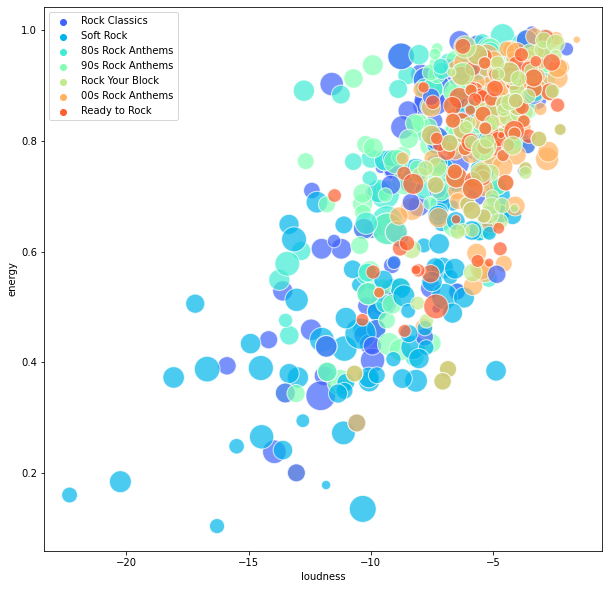

In [11]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df, x='loudness', y='energy',
                     hue='playlist_name', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:len(playlistIds)+1], labs[1:len(playlistIds)+1], loc='best', title=None)

In [12]:
playlist_mean_df = df.groupby(['playlist_id', 'playlist_name'], as_index=False).mean()
playlist_mean_df.head()

,playlist_id,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity
0,37i9dQZF1DWXRqgorJj26U,Rock Classics,0.513510,0.738960,4.680,-7.59671,0.770,0.058878,0.119395,0.054167,0.195945,0.585228,124.95683,260163.9400,3.9900,0.040,62.6700
1,37i9dQZF1DX1rVvRgjX59F,90s Rock Anthems,0.477000,0.778750,5.660,-7.07636,0.770,0.057453,0.049476,0.070270,0.187696,0.523900,120.06435,245863.2000,3.9600,0.140,55.3800
2,37i9dQZF1DX1spT6G94GFC,80s Rock Anthems,0.570075,0.799763,4.825,-7.25180,0.775,0.054456,0.091356,0.027149,0.185051,0.643012,125.39170,264598.7625,4.0125,0.025,58.2125
3,37i9dQZF1DX34lqLRYWFxq,Ready to Rock,0.503350,0.781570,5.230,-5.71062,0.630,0.060362,0.054706,0.038505,0.192741,0.475080,133.33335,195810.4500,3.9200,0.300,40.5900
4,37i9dQZF1DX3oM43CtKnRV,00s Rock Anthems,0.491850,0.845650,5.550,-4.72768,0.660,0.060125,0.036276,0.035798,0.203556,0.522553,127.41160,226276.6100,3.9400,0.120,63.9300


[Text(0.5, 1.0, 'Duration (ms)')]

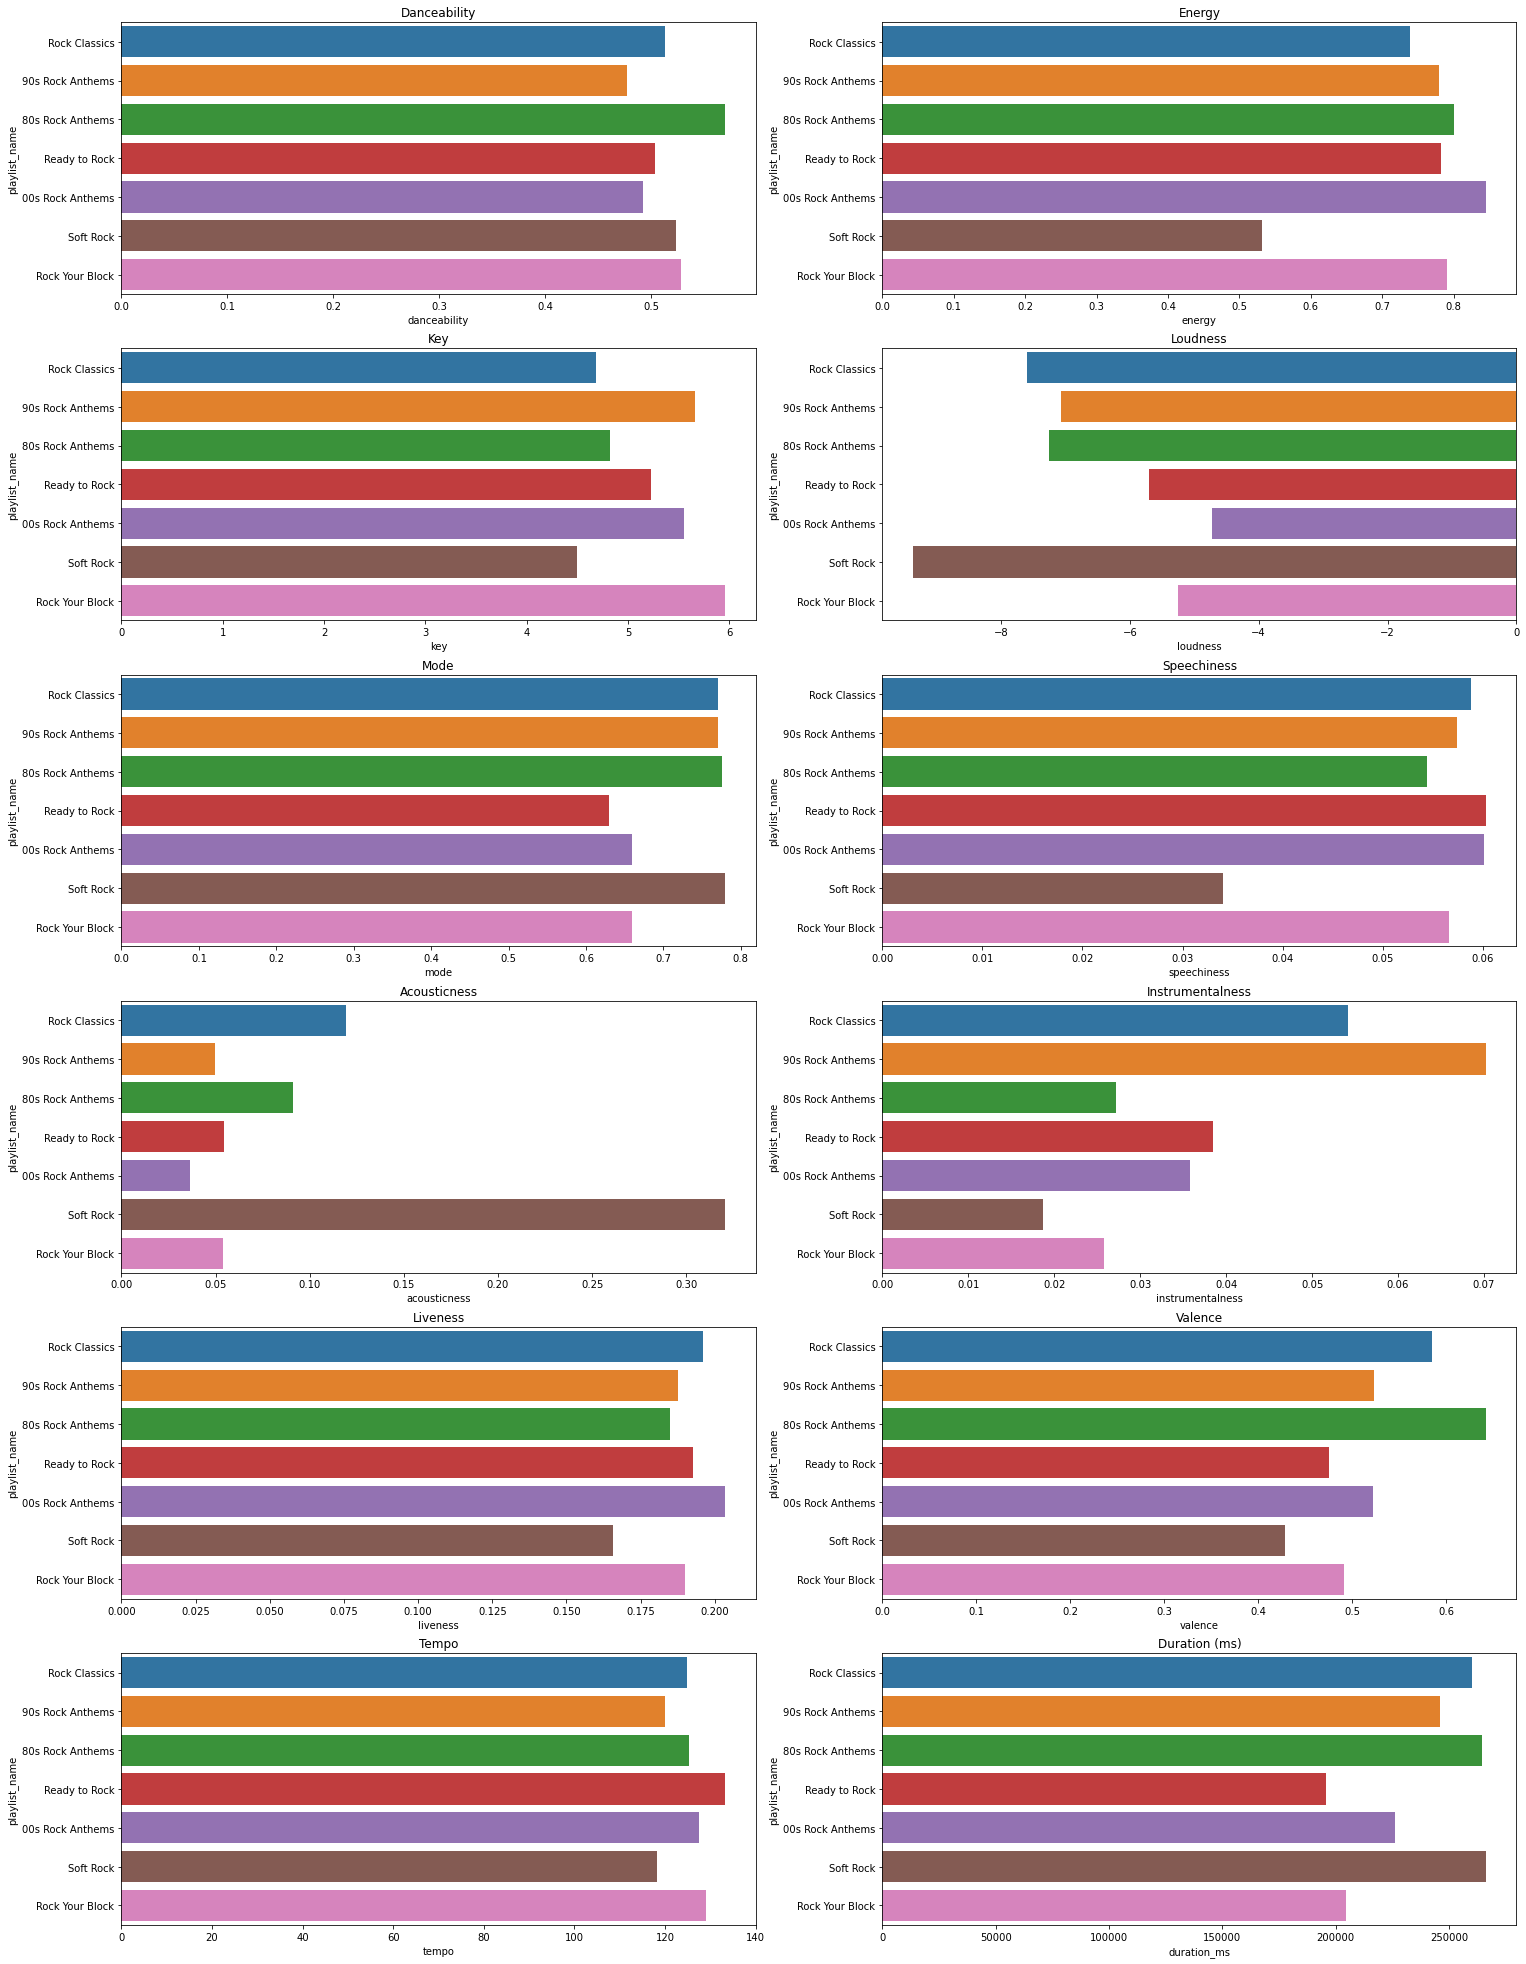

In [13]:
fig = plt.figure()
fig.set_figheight(35)
fig.set_figwidth(25)

ax = fig.add_subplot(6, 2, 1)
sns.barplot(x="danceability", y="playlist_name", data=playlist_mean_df).set(title='Danceability')

ax = fig.add_subplot(6, 2, 2)
sns.barplot(x="energy", y="playlist_name", data=playlist_mean_df).set(title='Energy')

ax = fig.add_subplot(6, 2, 3)
sns.barplot(x="key", y="playlist_name", data=playlist_mean_df).set(title='Key')

ax = fig.add_subplot(6, 2, 4)
sns.barplot(x="loudness", y="playlist_name", data=playlist_mean_df).set(title='Loudness')

ax = fig.add_subplot(6, 2, 5)
sns.barplot(x="mode", y="playlist_name", data=playlist_mean_df).set(title='Mode')

ax = fig.add_subplot(6, 2, 6)
sns.barplot(x="speechiness", y="playlist_name", data=playlist_mean_df).set(title='Speechiness')

ax = fig.add_subplot(6, 2, 7)
sns.barplot(x="acousticness", y="playlist_name", data=playlist_mean_df).set(title='Acousticness')

ax = fig.add_subplot(6, 2, 8)
sns.barplot(x="instrumentalness", y="playlist_name", data=playlist_mean_df).set(title='Instrumentalness')

ax = fig.add_subplot(6, 2, 9)
sns.barplot(x="liveness", y="playlist_name", data=playlist_mean_df).set(title='Liveness')

ax = fig.add_subplot(6, 2, 10)
sns.barplot(x="valence", y="playlist_name", data=playlist_mean_df).set(title='Valence')

ax = fig.add_subplot(6, 2, 11)
sns.barplot(x="tempo", y="playlist_name", data=playlist_mean_df).set(title='Tempo')

ax = fig.add_subplot(6, 2, 12)
sns.barplot(x="duration_ms", y="playlist_name", data=playlist_mean_df).set(title='Duration (ms)')

In [14]:
grouped_year_df = df.groupby(pd.DatetimeIndex(df['release_date']).year)
grouped_year_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,track_id,track_name,album_id,album_name,playlist_id,playlist_name,release_date,explicit,popularity
234,0.567,0.959,8,-3.822,1,0.1020,0.099500,0.000061,0.1000,0.961,...,4,1oG2vWELiGjIqxwqGcyqwF,You Really Got Me,3hXXoaAA09avxBSSxtPIaL,Kinks (Super Deluxe Edition),37i9dQZF1DWXRqgorJj26U,Rock Classics,1964-10-02,False,0
223,0.723,0.863,2,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.931,...,4,2PzU4IB8Dr6mxV3lHuaG34,(I Can't Get No) Satisfaction - Mono Version,2Q5MwpTmtjscaS34mJFXQQ,Out Of Our Heads,37i9dQZF1DWXRqgorJj26U,Rock Classics,1965-07-30,False,80
407,0.332,0.179,5,-11.830,1,0.0326,0.879000,0.000000,0.0886,0.315,...,4,1e0hllQ23AG0QGFgezgLOq,Yesterday - Remastered,19K3IHYeVkUTjcBHGfbCOi,Help! (Remastered),37i9dQZF1DX6xOPeSOGone,Soft Rock,1965-08-06,False,0
287,0.505,0.836,5,-7.384,0,0.1010,0.010300,0.077100,0.2950,0.764,...,4,1RJeiAIwR9pZBgJA8ndZLL,"Paint It, Black - Mono",5nKpMsduwp5xqCKq2IbSKv,The Rolling Stones In Mono (Remastered 2016),37i9dQZF1DWXRqgorJj26U,Rock Classics,1966-01-01,False,67
238,0.315,0.534,9,-7.552,0,0.0310,0.000825,0.108000,0.1010,0.283,...,3,61Q9oJNd9hJQFhSDh6Qlap,House Of The Rising Sun,0h5qS8o0dAoPfj6bLg3z3Y,The Best Of The Animals,37i9dQZF1DWXRqgorJj26U,Rock Classics,1966-02-01,False,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.532,0.794,4,-7.191,0,0.0329,0.008500,0.000005,0.1430,0.769,...,4,1PzG9uwuM6da6T2tCNlYfz,Always on the Edge,6kzLlWSMzUaFQRkPn4Ai7d,Always on the Edge,37i9dQZF1DX34lqLRYWFxq,Ready to Rock,2022-01-06,True,30
186,0.523,0.874,0,-5.076,1,0.0435,0.039900,0.000527,0.2560,0.540,...,4,1EXm3LiwvcJA9t4xA6kp1V,Hellbound,1kfFVkWbq62lKHWtW2yPj8,Hellbound,37i9dQZF1DX34lqLRYWFxq,Ready to Rock,2022-01-07,False,44
142,0.517,0.877,11,-6.380,0,0.0453,0.004020,0.045400,0.0895,0.362,...,4,5ElI4FJe3HnOeXCnzewjfy,Ammunition,7b5hvyZJ6sezSlccARvcqI,End Of The Ocean,37i9dQZF1DX34lqLRYWFxq,Ready to Rock,2022-01-14,False,34
49,0.509,0.790,9,-5.233,0,0.0334,0.061900,0.000022,0.0782,0.298,...,4,1N61QLRTGgzb97qTd03KhZ,Truth Be Told,58rMecu5z9tfXa3Vambk9c,Truth Be Told,37i9dQZF1DX8jpyvTAre41,Rock Your Block,2022-01-14,False,33


In [15]:
mean_year_df = grouped_year_df.mean()
mean_year_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity
release_date,,,,,,,,,,,,,,,
1964,0.5670,0.9590,8.0,-3.8220,1.0,0.10200,0.099500,0.000061,0.1000,0.9610,137.3770,133933.0,4.0,0.0,0.0
1965,0.5275,0.5210,3.5,-9.8600,1.0,0.03320,0.458650,0.015850,0.1083,0.6230,116.4155,174240.0,4.0,0.0,40.0
1966,0.4100,0.6850,7.0,-7.4680,0.0,0.06600,0.005562,0.092550,0.1980,0.5235,138.2800,237100.0,3.5,0.0,65.5
1967,0.4210,0.7510,9.0,-9.5840,1.0,0.04720,0.200000,0.000000,0.1700,0.7890,89.8390,145867.0,4.0,0.0,75.0
1968,0.4380,0.7575,5.0,-9.3245,1.0,0.07715,0.132275,0.268528,0.1526,0.5470,129.5905,225586.5,4.0,0.0,78.0


[Text(0.5, 1.0, 'Duration (ms)')]

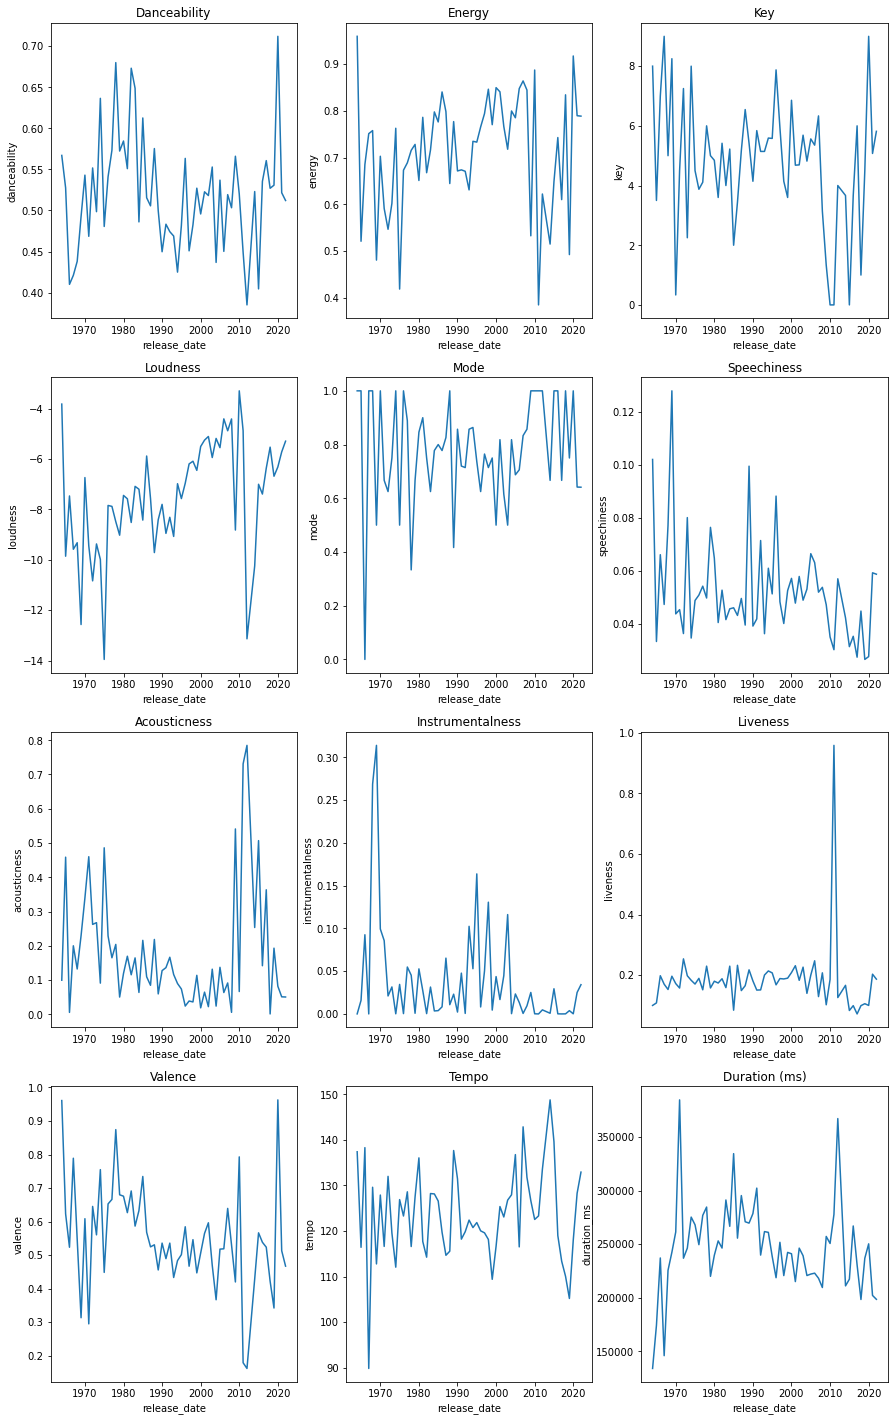

In [16]:
fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(15)

ax = fig.add_subplot(4, 3, 1)
sns.lineplot(data=mean_year_df, x="release_date", y="danceability").set(title='Danceability')

ax = fig.add_subplot(4, 3, 2)
sns.lineplot(data=mean_year_df, x="release_date", y="energy").set(title='Energy')

ax = fig.add_subplot(4, 3, 3)
sns.lineplot(data=mean_year_df, x="release_date", y="key").set(title='Key')

ax = fig.add_subplot(4, 3, 4)
sns.lineplot(data=mean_year_df, x="release_date", y="loudness").set(title='Loudness')

ax = fig.add_subplot(4, 3, 5)
sns.lineplot(data=mean_year_df, x="release_date", y="mode").set(title='Mode')

ax = fig.add_subplot(4, 3, 6)
sns.lineplot(data=mean_year_df, x="release_date", y="speechiness").set(title='Speechiness')

ax = fig.add_subplot(4, 3, 7)
sns.lineplot(data=mean_year_df, x="release_date", y="acousticness").set(title='Acousticness')

ax = fig.add_subplot(4, 3, 8)
sns.lineplot(data=mean_year_df, x="release_date", y="instrumentalness").set(title='Instrumentalness')

ax = fig.add_subplot(4, 3, 9)
sns.lineplot(data=mean_year_df, x="release_date", y="liveness").set(title='Liveness')

ax = fig.add_subplot(4, 3, 10)
sns.lineplot(data=mean_year_df, x="release_date", y="valence").set(title='Valence')

ax = fig.add_subplot(4, 3, 11)
sns.lineplot(data=mean_year_df, x="release_date", y="tempo").set(title='Tempo')

ax = fig.add_subplot(4, 3, 12)
sns.lineplot(data=mean_year_df, x="release_date", y="duration_ms").set(title='Duration (ms)')